In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
import seaborn as sns

In [166]:
# 加载训练集和测试集
# 字段名
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']

# 加载训练集
training_raw = pd.read_csv('C:\\Users\\xiaoqian\\Desktop\\cpg-G_Fuji\\工资分类预测\\dataset\\adult.data',
            names=headers,  #字段名/列名
            sep=",\s",  #以‘，空格’隔开
            na_values=["?"],  #数据集中是“？”的为空值  na_values：识别什么字符为空值
            engine="python") #以python解析
# 加载测试集
test_raw = pd.read_csv('C:\\Users\\xiaoqian\\Desktop\\cpg-G_Fuji\\工资分类预测\\dataset\\adult.test',
            names=headers,
            sep=",\s",
            na_values=["?"],
            engine="python",
            skiprows=1)  #跳过第一行

In [167]:
training_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [168]:
training_raw.shape

(32561, 15)

In [169]:
test_raw.shape

(16281, 15)

In [170]:
#训练集和测试集合并到一起
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)  #重置索引
dataset_raw.drop('index',inplace=True,axis=1) #删除原来的index列

In [171]:
dataset_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [172]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  predclass       48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [173]:
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [174]:
!pip install missingno 

<Axes: >

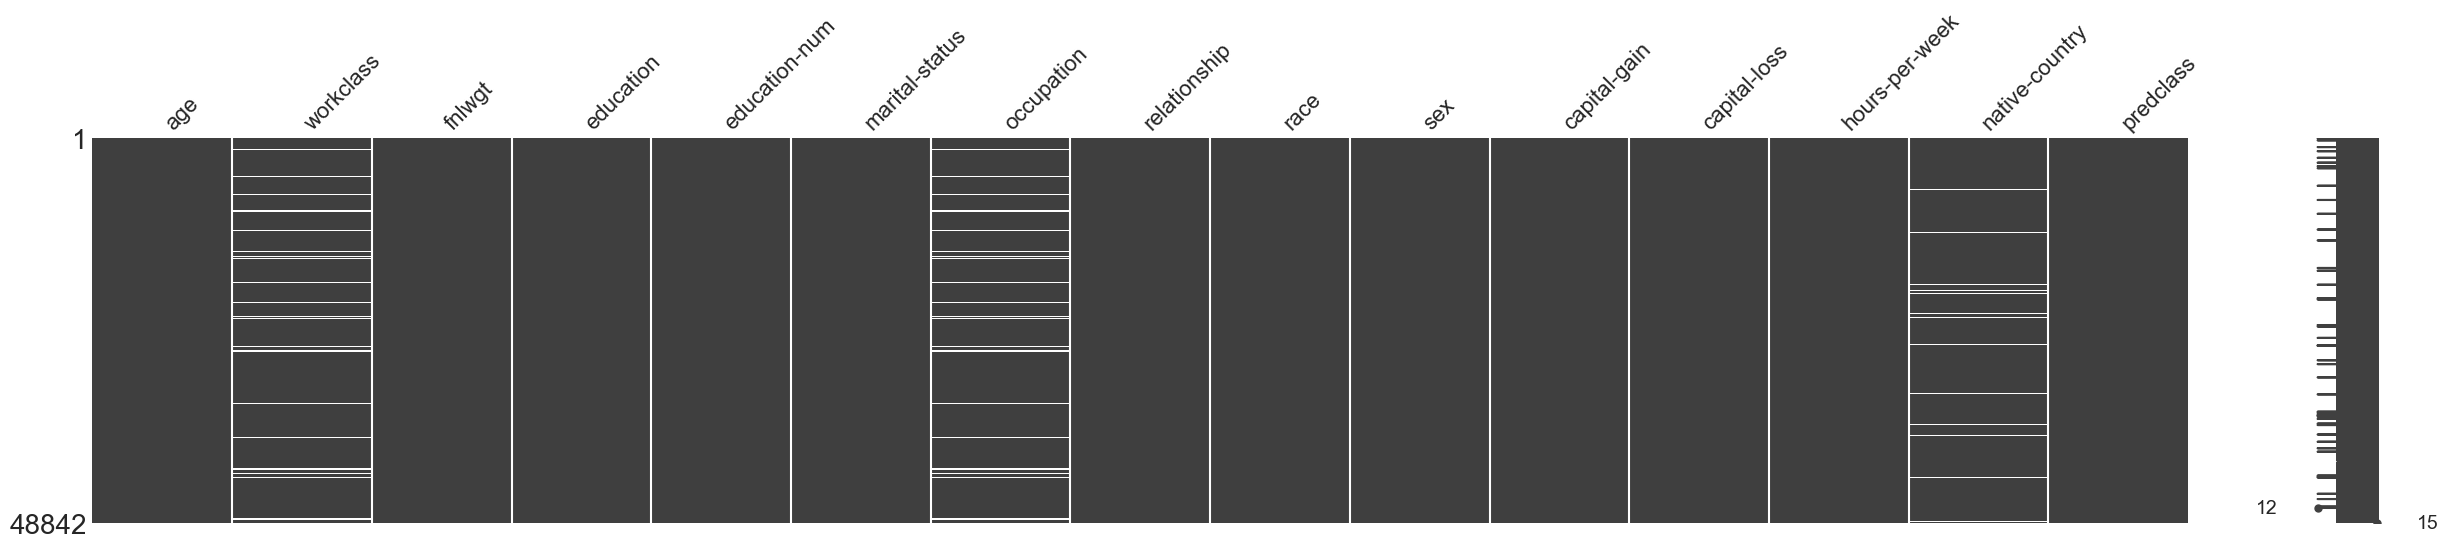

In [175]:
import missingno
missingno.matrix(dataset_raw,figsize=(30,5)) #以矩阵的方式展现缺失值

<Axes: >

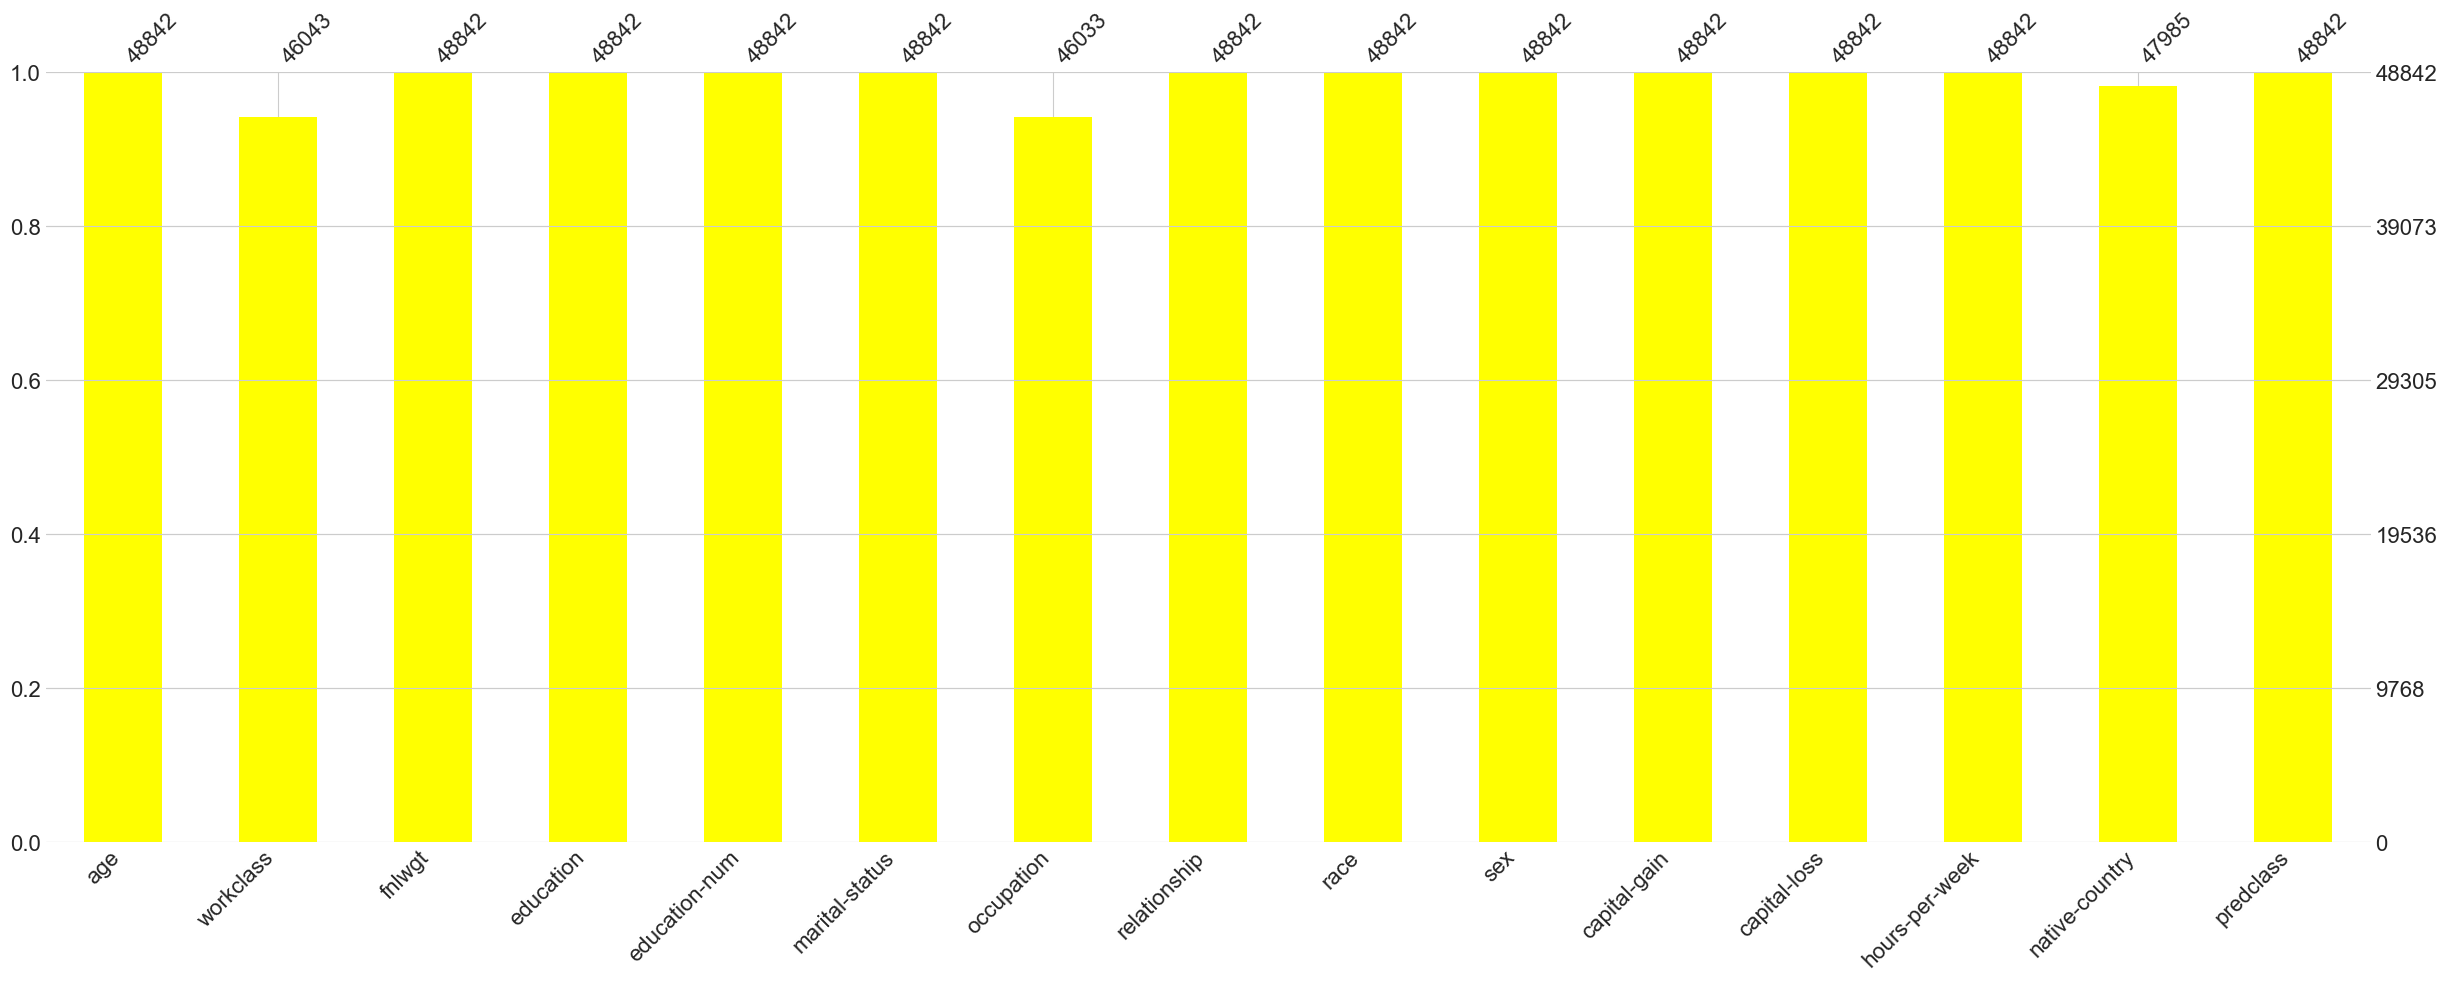

In [176]:
#使用条形图来查看缺失值
missingno.bar(dataset_raw,figsize=(30,10),color="yellow")

In [177]:
#数字型特征
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [178]:
#标量型特征
dataset_raw.describe(include="O")
#count:总数  unique：种类  top ：最多的是 freq ：最多的有多少数量

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [179]:
#准备工作
import numpy as np
import math
#定义一个画图函数 绘制每个特征的分布 参数(数据集，列数，宽，高，高距，宽距)
def plot_distribution(dataset,cols=0,width=0,height=0,hspace=0,wspace=0):
    #设置风格，白网格
    plt.style.use('seaborn-whitegrid')
    #设置画布大小
    fig = plt.figure(figsize=(width,height))
    #子图调整，为了美观，可以调节宽高等
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    row = math.ceil(float(dataset.shape[1] / cols))
    
    for i,column in enumerate(dataset.columns):
        ax = fig.add_subplot(row,cols,i+1)
        ax.set_title(column) #设置标题
        
        if dataset.dtypes[column] == np.object:  #判断类型
            g = sns.countplo(y = column,data = dataset)
            plt.xticks(rotation = 30)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation = 30)

In [180]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.11.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Chinese (Simplified)_China.936

pandas           : 1.5.3
numpy            : 1.24.3
pytz             : 2022.7
dateutil         : 2.8.2
setuptools       : 68.0.0
pip              : 23.2.1
Cython           : None
pytest           : 7.4.0
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.12.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : 1.3.

AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

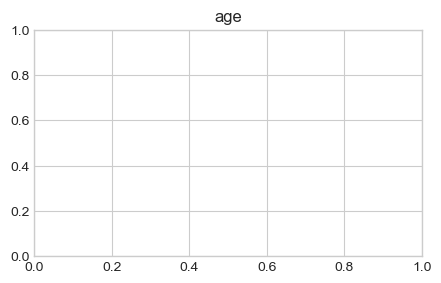

In [181]:
#import warnings
#warnings.filterwarnings('ignore')
#plot_distribution(dataset_raw,cols=2,width=20,height=20,hspace=1,wspace=1)
import warnings
warnings.filterwarnings('ignore') 
plot_distribution(dataset_raw,cols=3,width=20,height=20,hspace=0.45,wspace=0.5)

In [182]:
dataset_bin = pd.DataFrame()
dataset_con = pd.DataFrame()

In [183]:
dataset_raw.loc[dataset_raw['predclass']=='>50K','predclass'] = 1
dataset_raw.loc[dataset_raw['predclass']=='>50K.','predclass'] = 1
dataset_raw.loc[dataset_raw['predclass']=='<=50K','predclass'] = 0
dataset_raw.loc[dataset_raw['predclass']=='<=50K.','predclass'] = 0
dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

In [184]:
dataset_bin

,predclass
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [185]:
dataset_con

,predclass
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [186]:
dataset_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


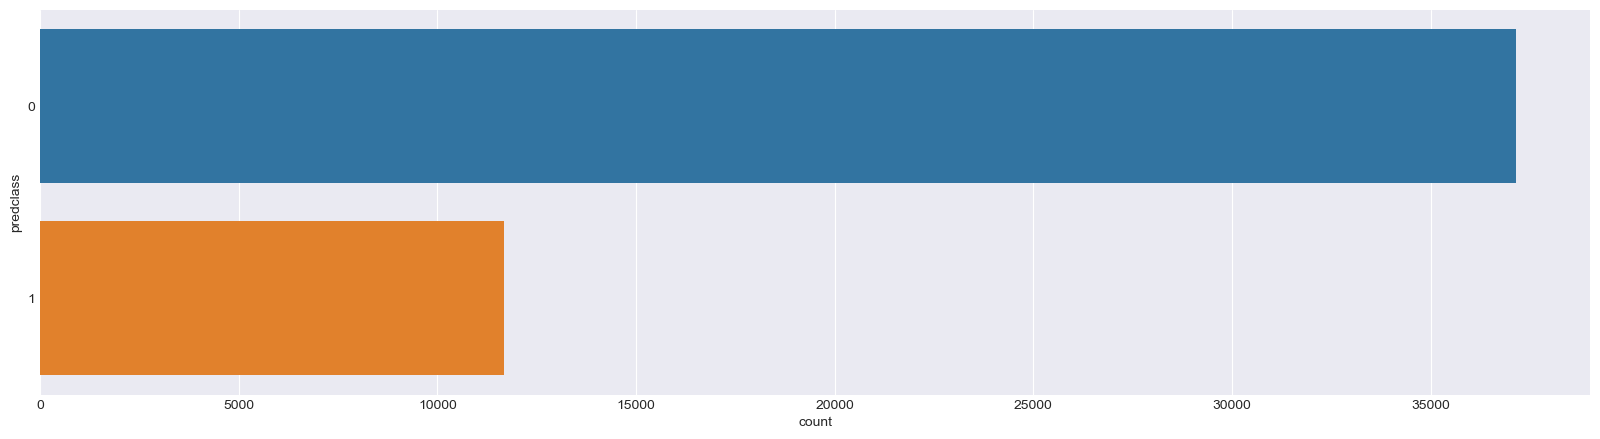

In [187]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='predclass',data = dataset_raw)
plt.show()

In [188]:
dataset_bin['age'] = pd.cut(dataset_raw['age'],10)
dataset_con['age'] = dataset_raw['age']

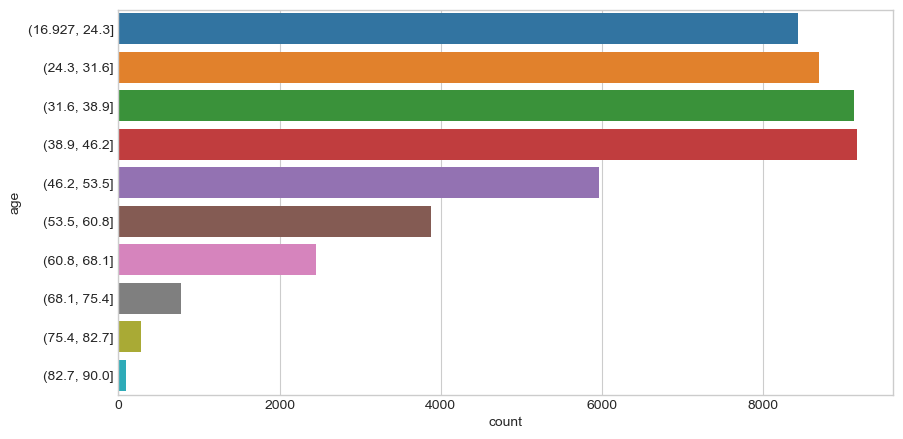

In [189]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,5))
sns.countplot(y = 'age',data = dataset_bin)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

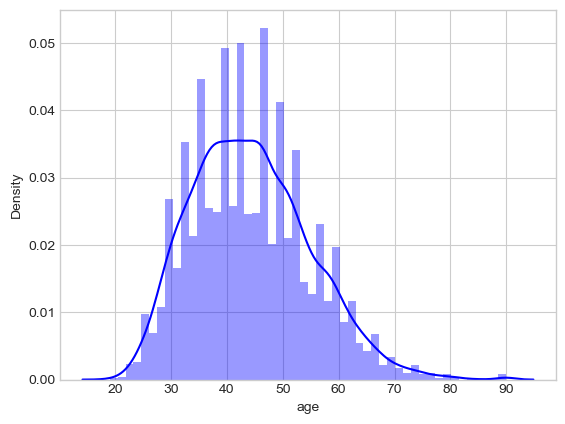

In [190]:
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 1]['age'],color='blue')

<Axes: xlabel='age', ylabel='Density'>

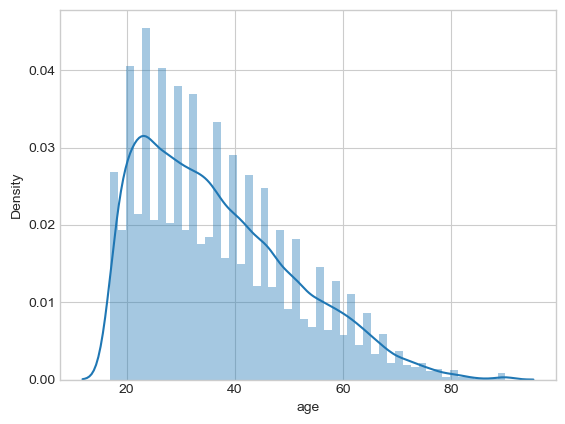

In [191]:
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age'])

<Axes: xlabel='age', ylabel='Density'>

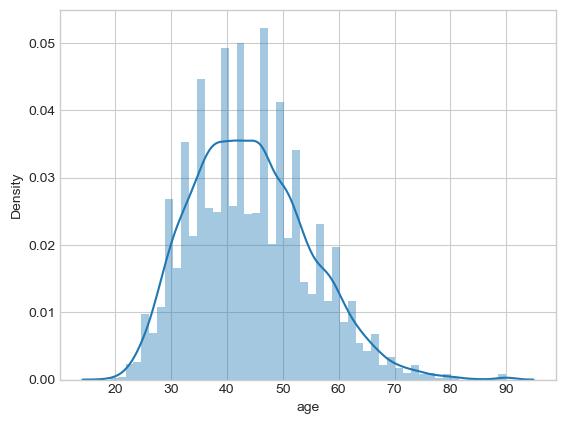

In [192]:
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age']) 

<Axes: xlabel='count', ylabel='workclass'>

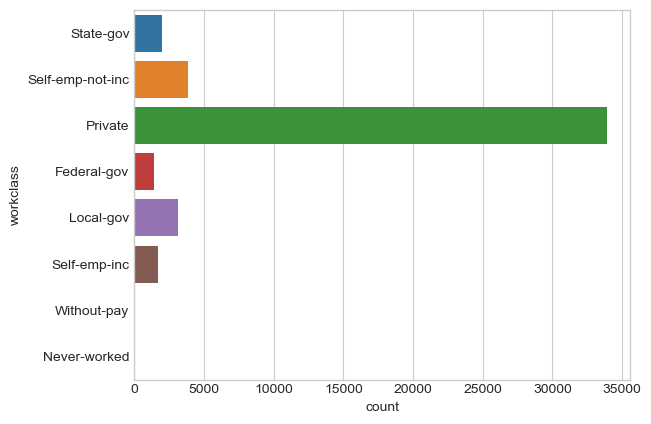

In [193]:
sns.countplot(y='workclass',data=dataset_raw)

In [194]:
dataset_raw.loc[dataset_raw['workclass'] == 'Without-pay','workclass'] = 'Not Working'
#将dataset_raaw里面workclass是without pay的列取出来，然后把workclass这一列都换成notworking
dataset_raw.loc[dataset_raw['workclass']=='Never-worked','workclass'] = 'Not Working'
# 联邦政府工作
dataset_raw.loc[dataset_raw['workclass']=='Federal-gov','workclass'] = 'Fed-gov'
#非联邦政府工作 1.州政府 2.地方政府
dataset_raw.loc[dataset_raw['workclass']=='State-gov','workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass']=='Local-gov','workclass'] = 'Non-fed-gov'
#自由职业者
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-not-inc','workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-inc','workclass'] = 'Self-emp'

# 存储记录
dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

<Axes: xlabel='count', ylabel='workclass'>

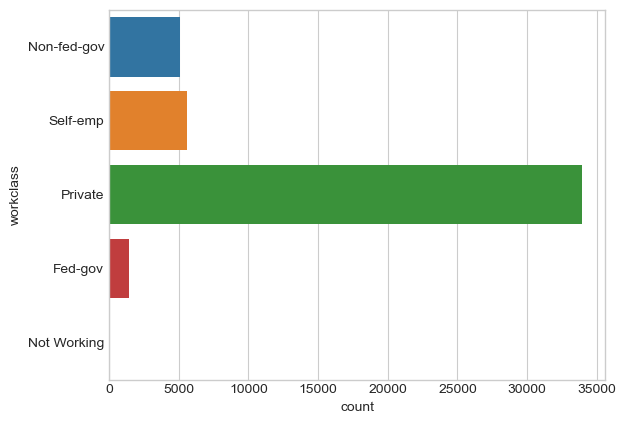

In [195]:
sns.countplot(y = 'workclass',data = dataset_raw)

In [196]:
dataset_bin


,predclass,age,workclass
0,0,"(38.9, 46.2]",Non-fed-gov
1,0,"(46.2, 53.5]",Self-emp
2,0,"(31.6, 38.9]",Private
3,0,"(46.2, 53.5]",Private
4,0,"(24.3, 31.6]",Private
...,...,...,...
48837,0,"(38.9, 46.2]",Private
48838,0,"(60.8, 68.1]",NaN
48839,0,"(31.6, 38.9]",Private
48840,0,"(38.9, 46.2]",Private


In [197]:
dataset_con

,predclass,age,workclass
0,0,39,Non-fed-gov
1,0,50,Self-emp
2,0,38,Private
3,0,53,Private
4,0,28,Private
...,...,...,...
48837,0,39,Private
48838,0,64,NaN
48839,0,38,Private
48840,0,44,Private


<Axes: xlabel='count', ylabel='occupation'>

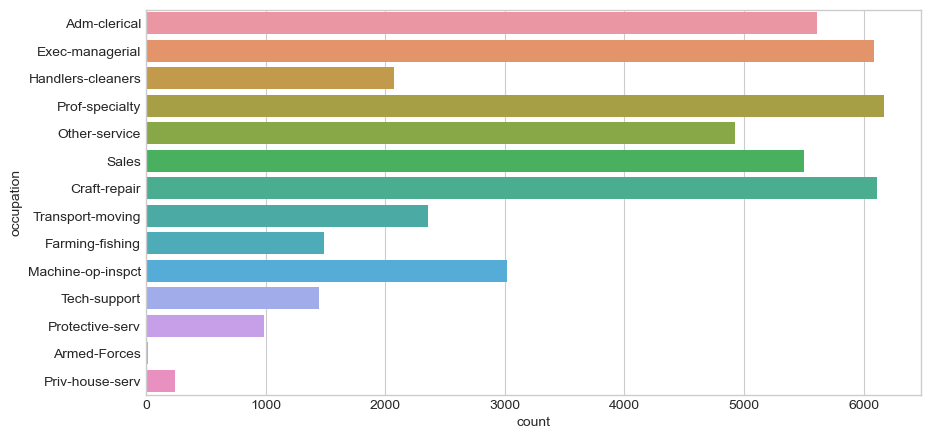

In [198]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(y = 'occupation',data = dataset_raw)

In [199]:
dataset_raw['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [200]:
#Adm-clerical：行政管理
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
#Military：军事  Protective-serv：保护服务  Armed-Forces：武装部队
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
#Craft-repair：工艺维修  Farming-fishing：农业捕鱼 Handlers-cleaners：搬运工-清洁工  Machine-op-inspct：机器操作员/接线员
#Transport-moving：运输搬家   Manual Labour：体力活
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'
#Other-service：其他服务  Priv-house-serv：私人房屋服务   Service：服务
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
#Prof-specialty：教授专业  Professional：专业
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'
#Sales：销售  Tech-support：技术支持  Exec-managerial：执行管理团队  Office Labour：办公室劳动 
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'


dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

In [201]:
dataset_bin

,predclass,age,workclass,occupation
0,0,"(38.9, 46.2]",Non-fed-gov,Admin
1,0,"(46.2, 53.5]",Self-emp,Office Labour
2,0,"(31.6, 38.9]",Private,Manual Labour
3,0,"(46.2, 53.5]",Private,Manual Labour
4,0,"(24.3, 31.6]",Private,Professional
...,...,...,...,...
48837,0,"(38.9, 46.2]",Private,Professional
48838,0,"(60.8, 68.1]",NaN,NaN
48839,0,"(31.6, 38.9]",Private,Professional
48840,0,"(38.9, 46.2]",Private,Admin


<Axes: xlabel='count', ylabel='occupation'>

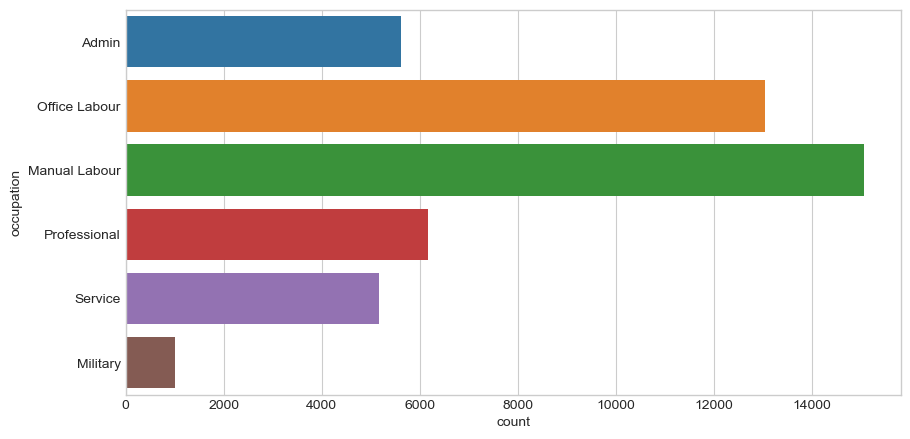

In [202]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(y = 'occupation',data=dataset_raw)

In [203]:
dataset_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,Non-fed-gov,77516,Bachelors,13,Never-married,Admin,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,13,Married-civ-spouse,Office Labour,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Manual Labour,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Manual Labour,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Professional,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Professional,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Professional,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Admin,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


<Axes: xlabel='count', ylabel='native-country'>

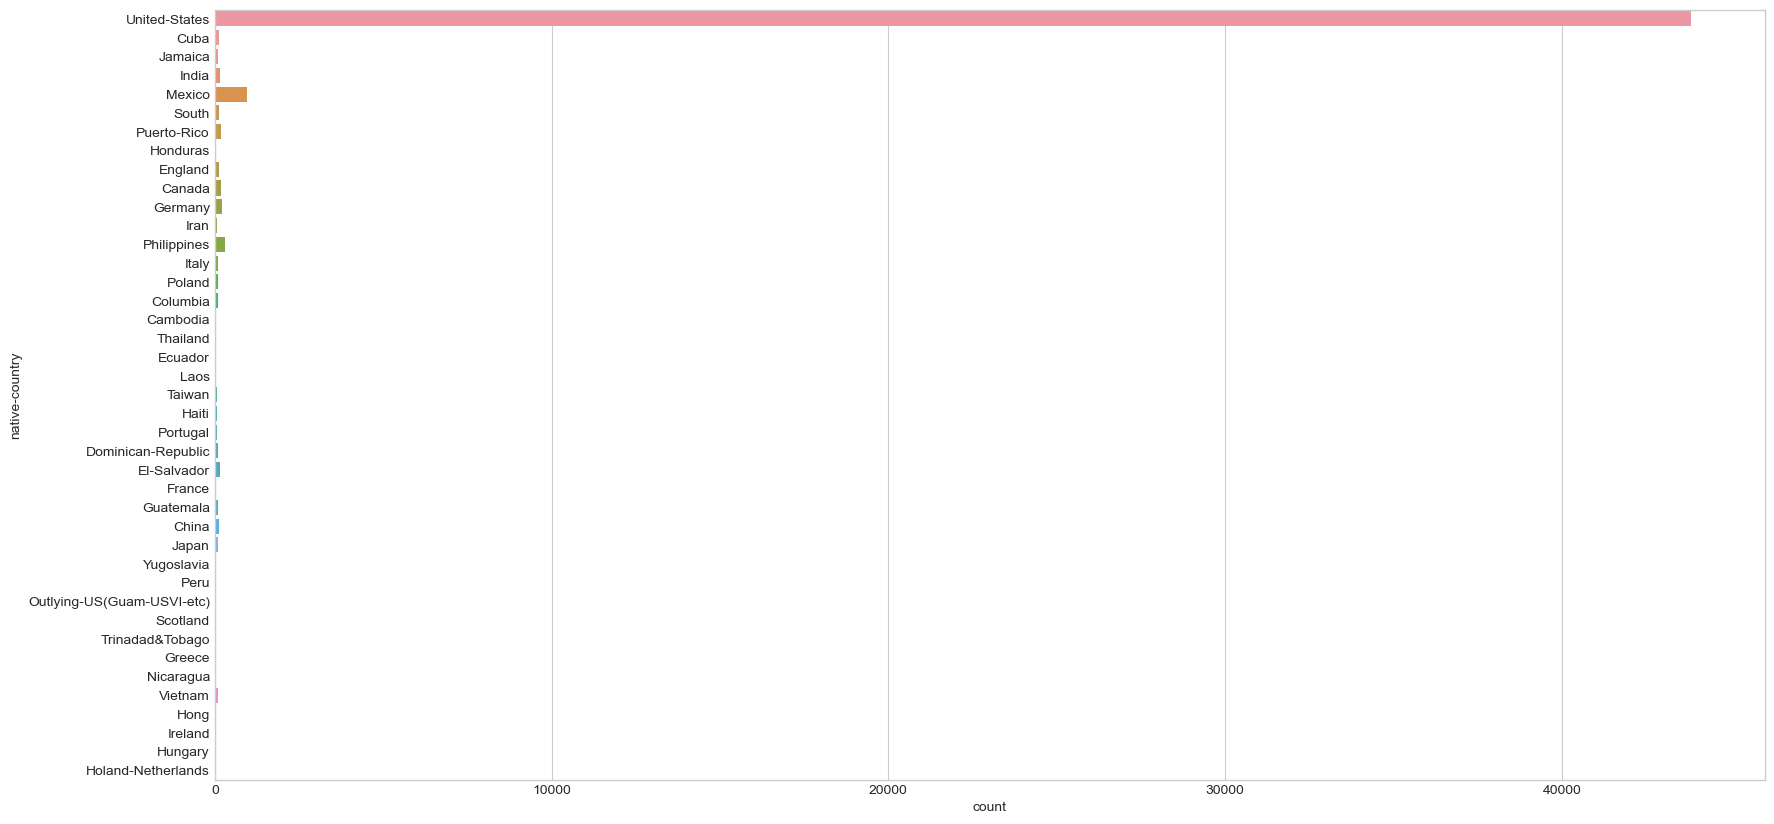

In [204]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(y = 'native-country',data=dataset_raw)

In [205]:
dataset_raw['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [206]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']

<Axes: xlabel='count', ylabel='native-country'>

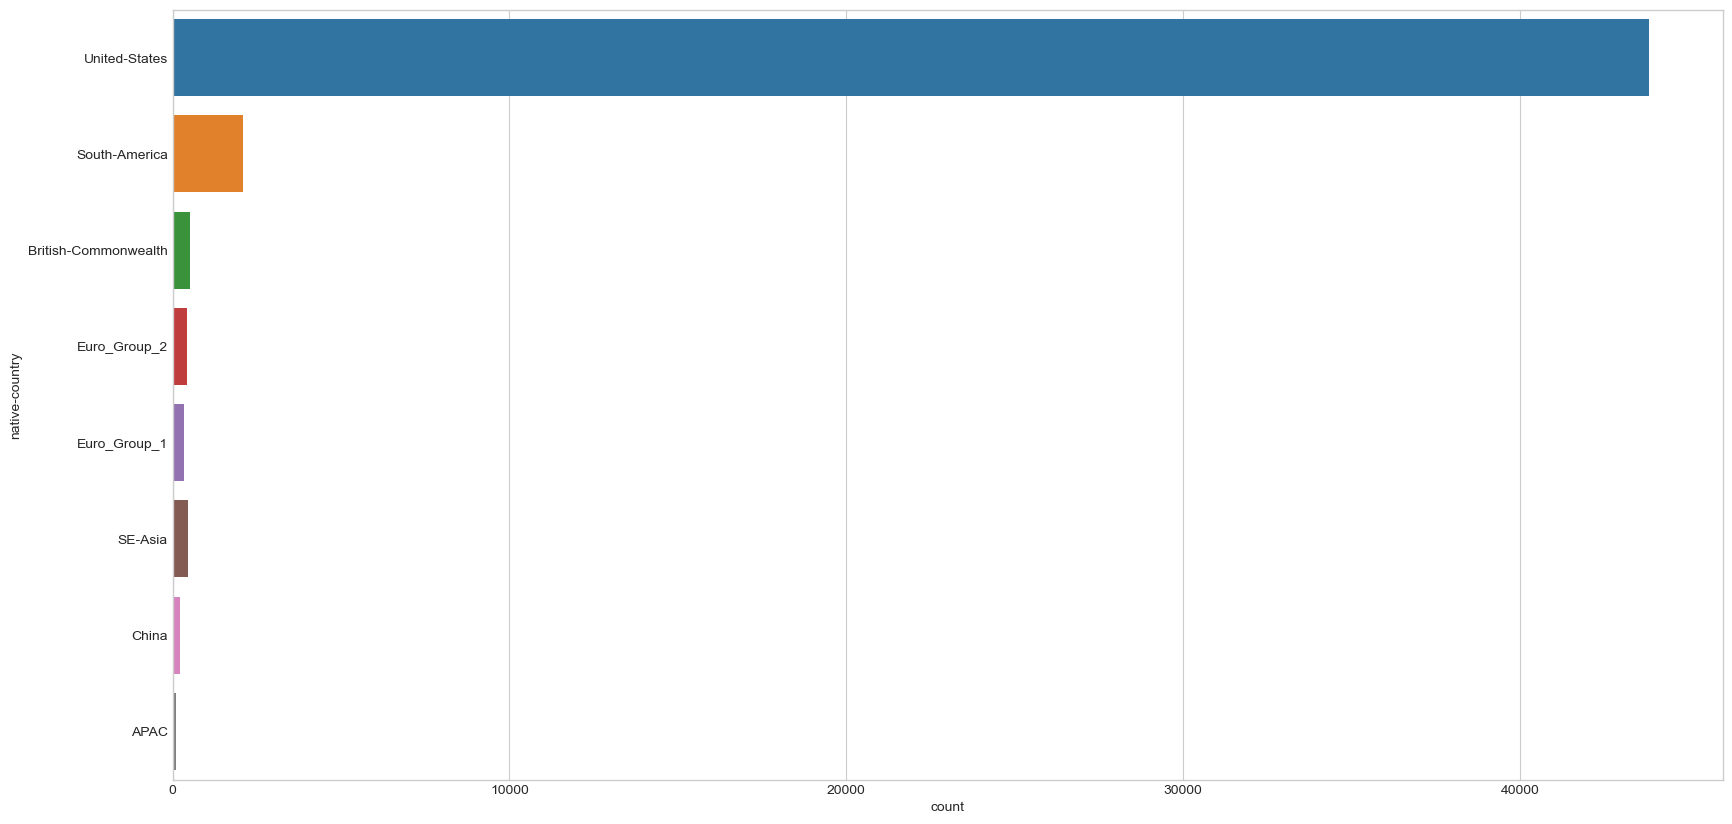

In [207]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(y = 'native-country',data=dataset_raw)

<Axes: xlabel='count', ylabel='education'>

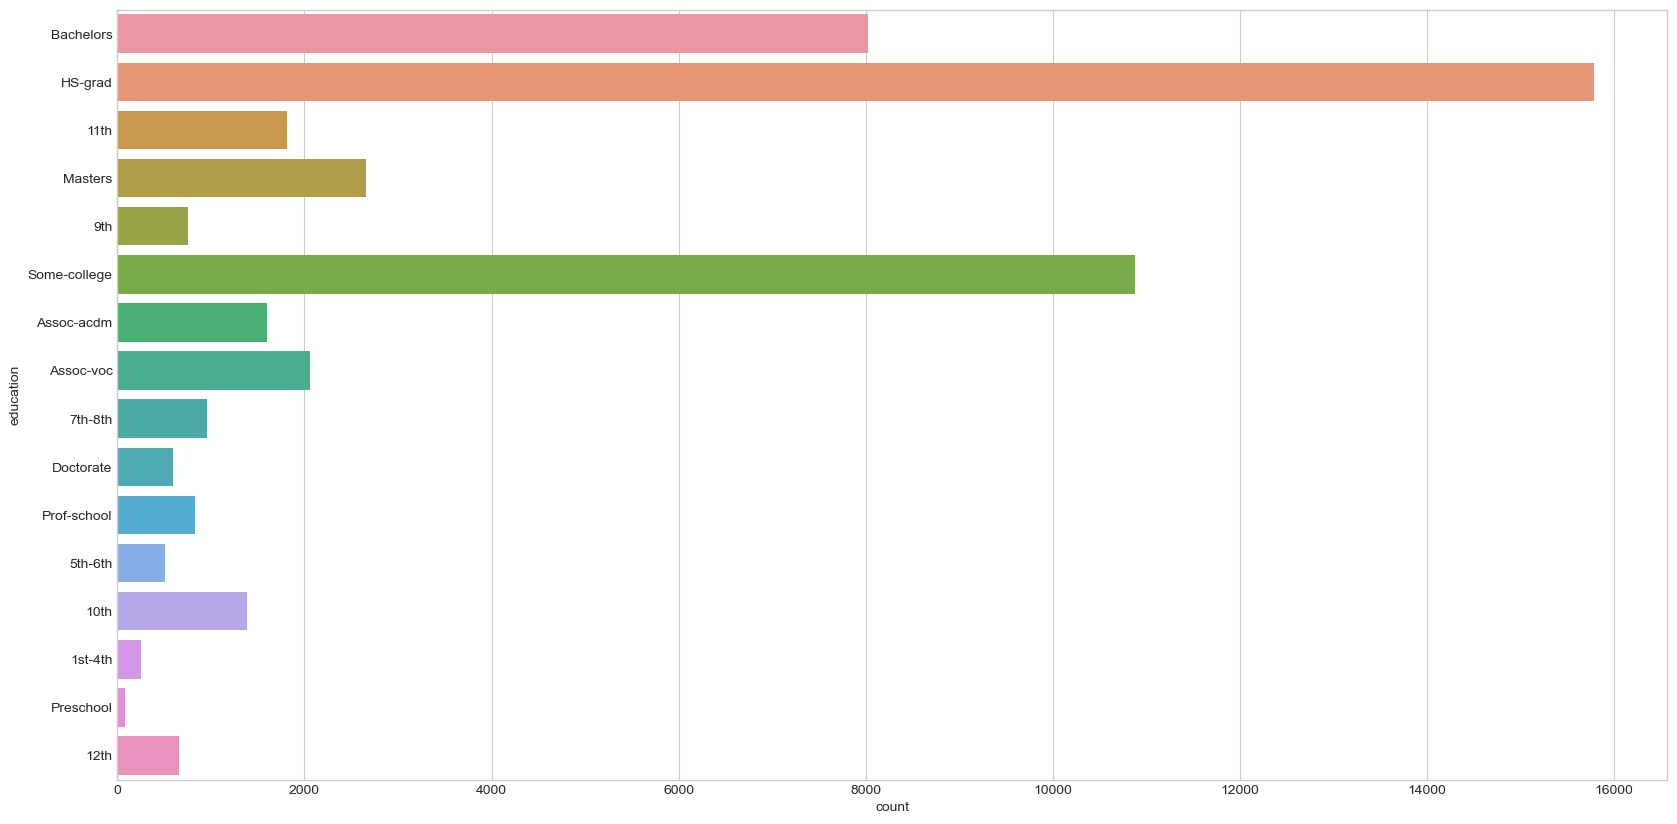

In [208]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(y = 'education',data=dataset_raw)

In [209]:
dataset_raw['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [210]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

<Axes: xlabel='count', ylabel='education'>

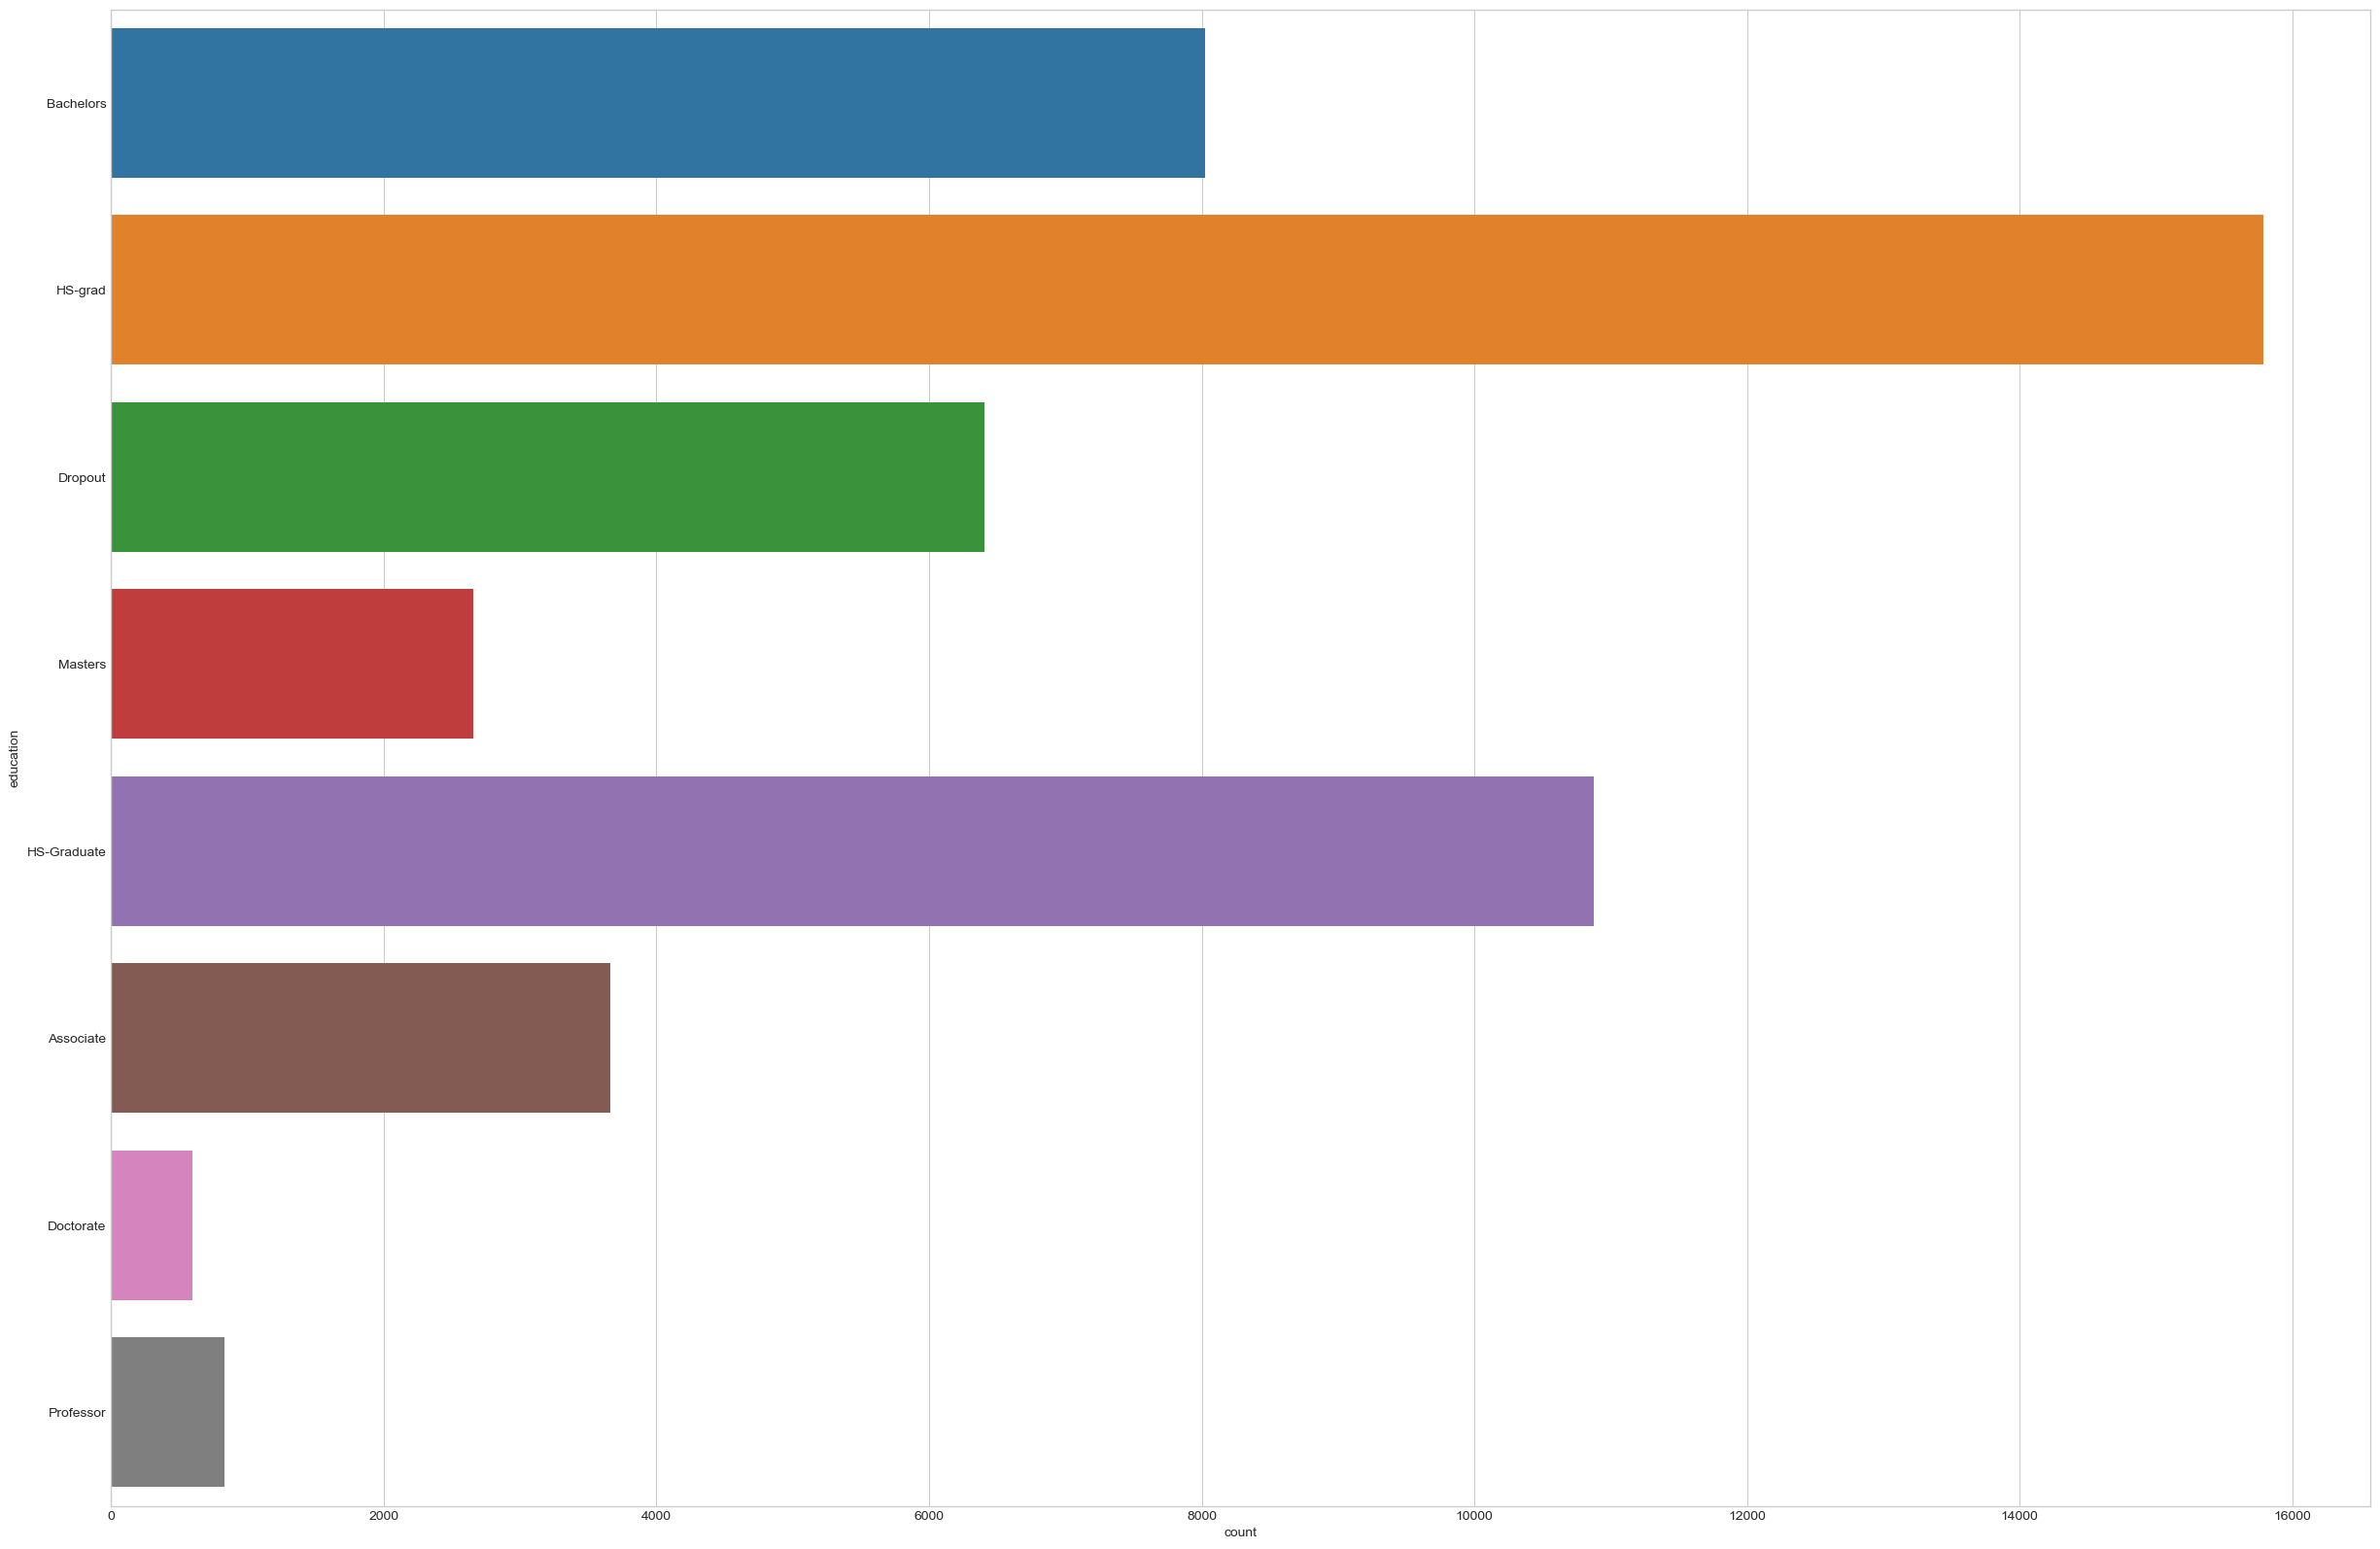

In [211]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(30,20))
sns.countplot(y = 'education',data=dataset_bin)

In [212]:
dataset_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,Non-fed-gov,77516,Bachelors,13,Never-married,Admin,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,13,Married-civ-spouse,Office Labour,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Manual Labour,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,Dropout,7,Married-civ-spouse,Manual Labour,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Professional,Wife,Black,Female,0,0,40,South-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Professional,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Professional,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Admin,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


<Axes: xlabel='count', ylabel='marital-status'>

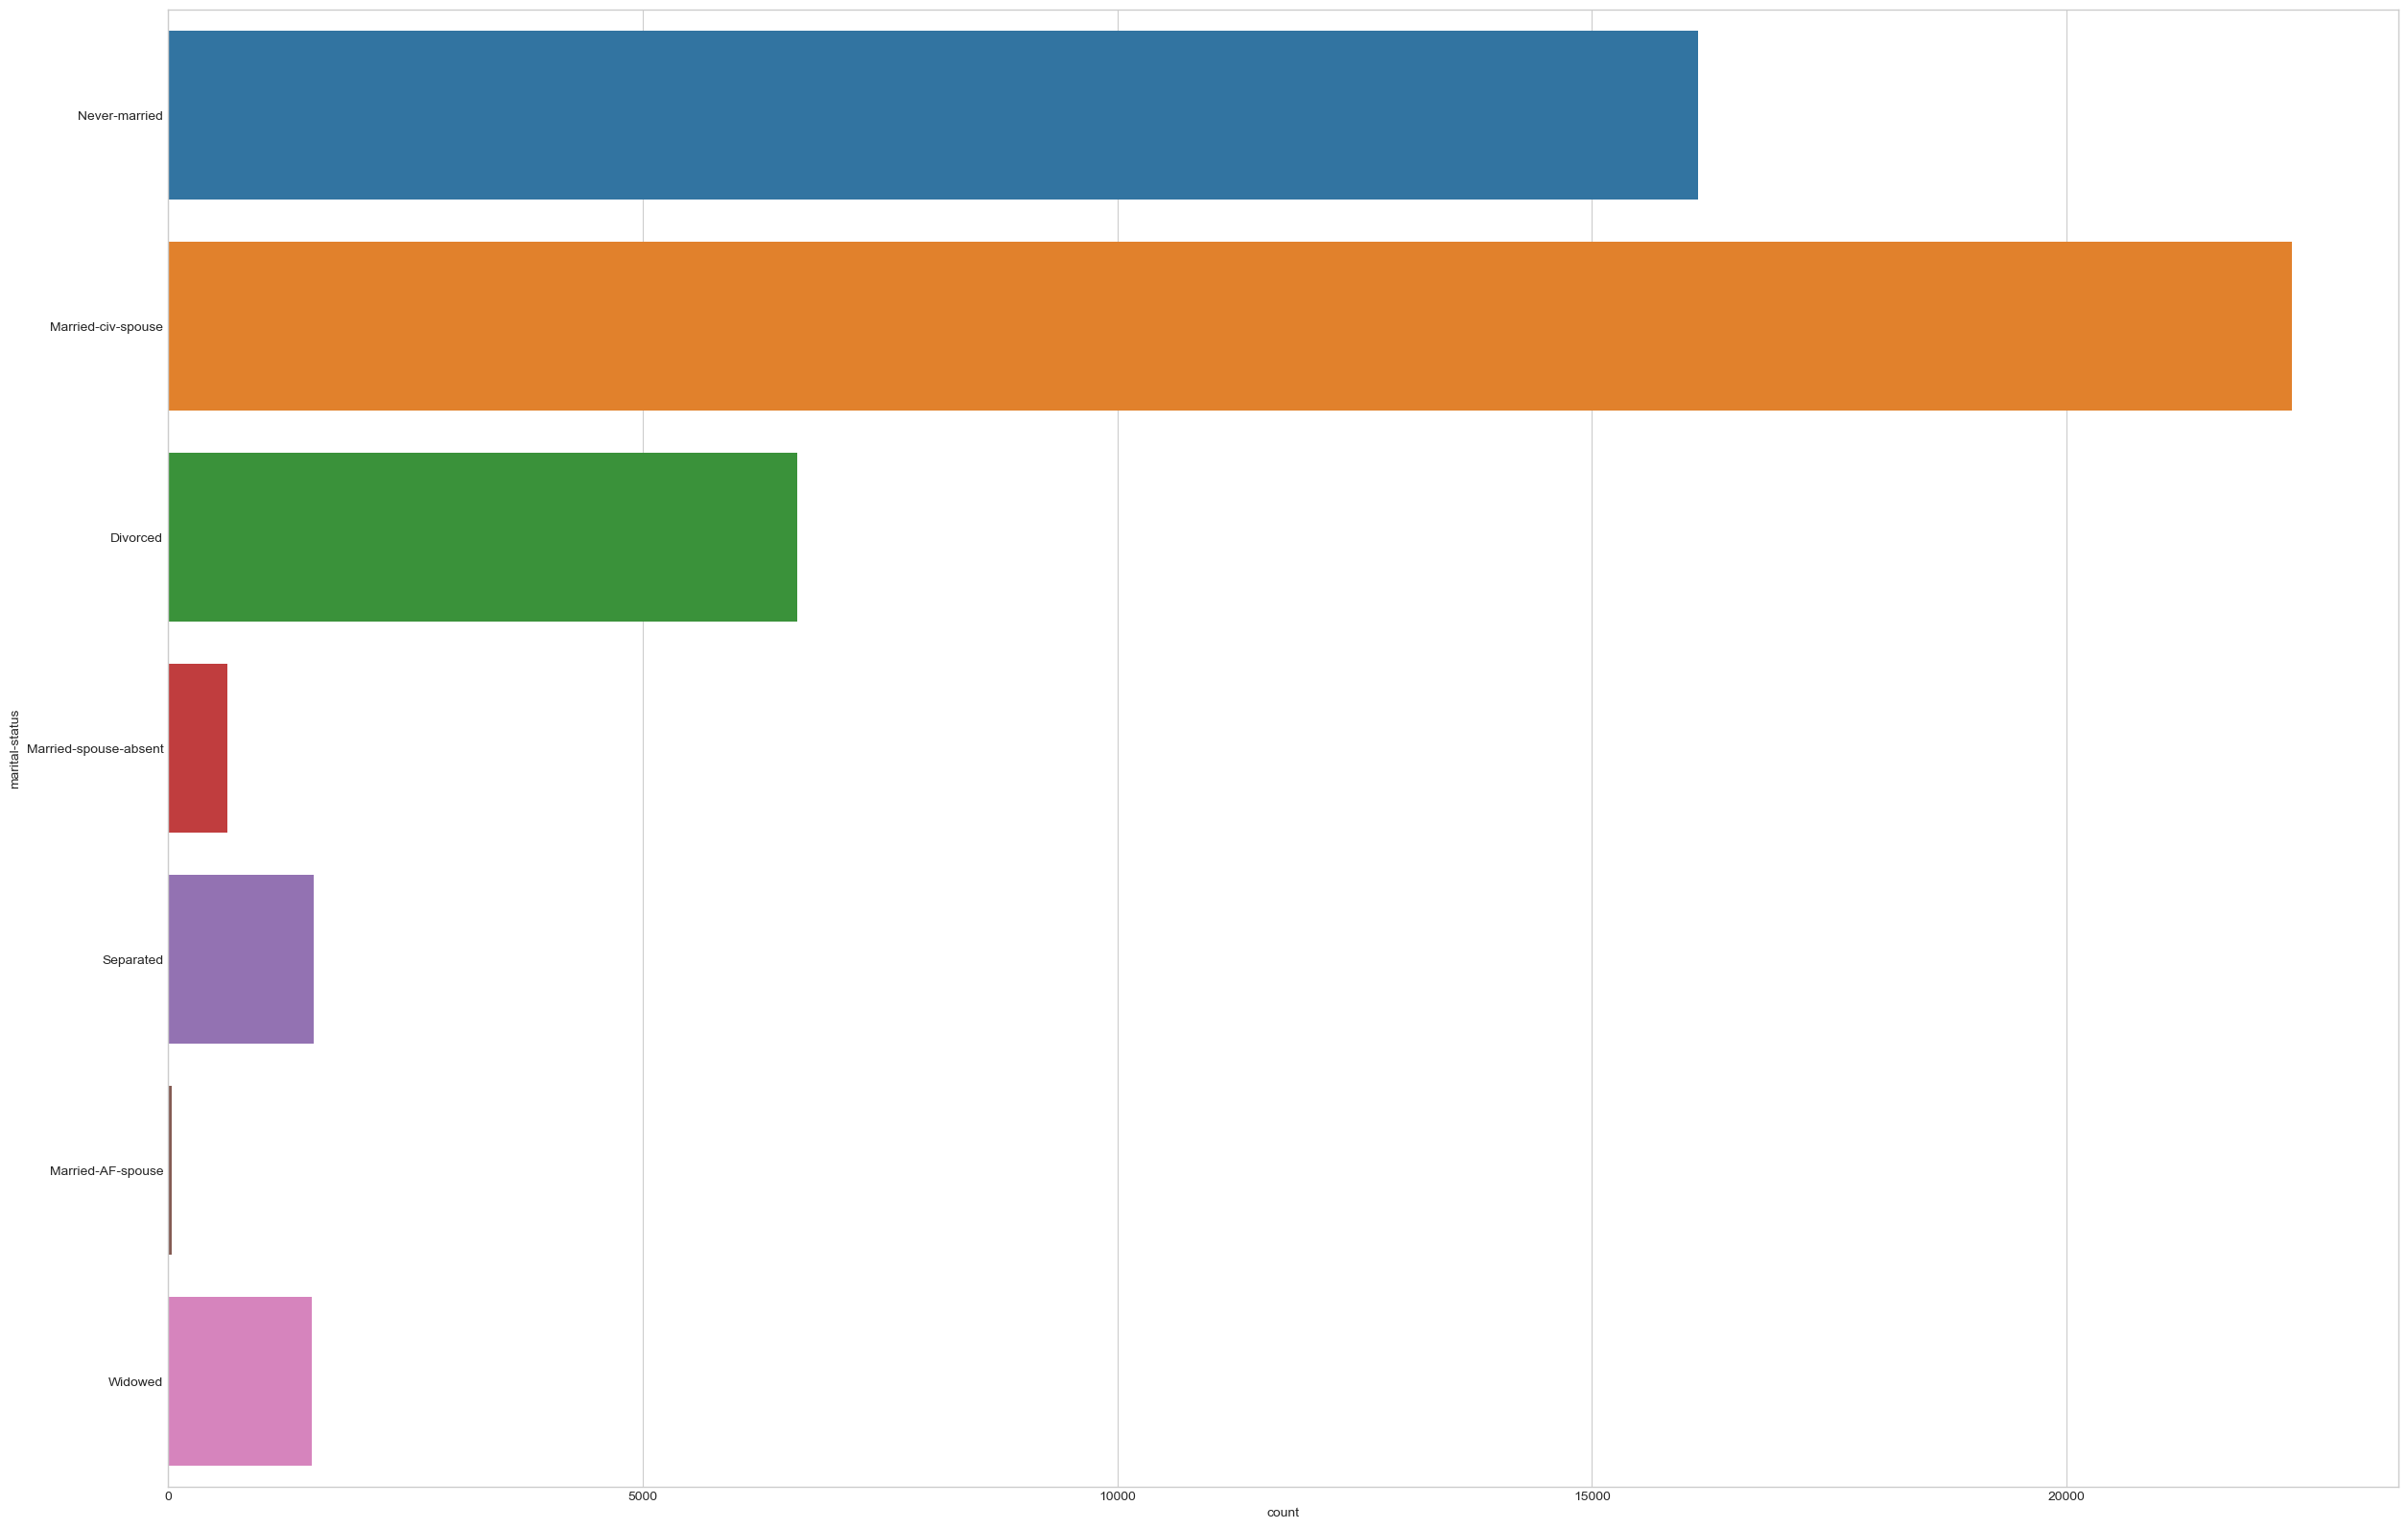

In [213]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(30,20))
sns.countplot(y = 'marital-status',data=dataset_raw)

In [214]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

<Axes: xlabel='count', ylabel='marital-status'>

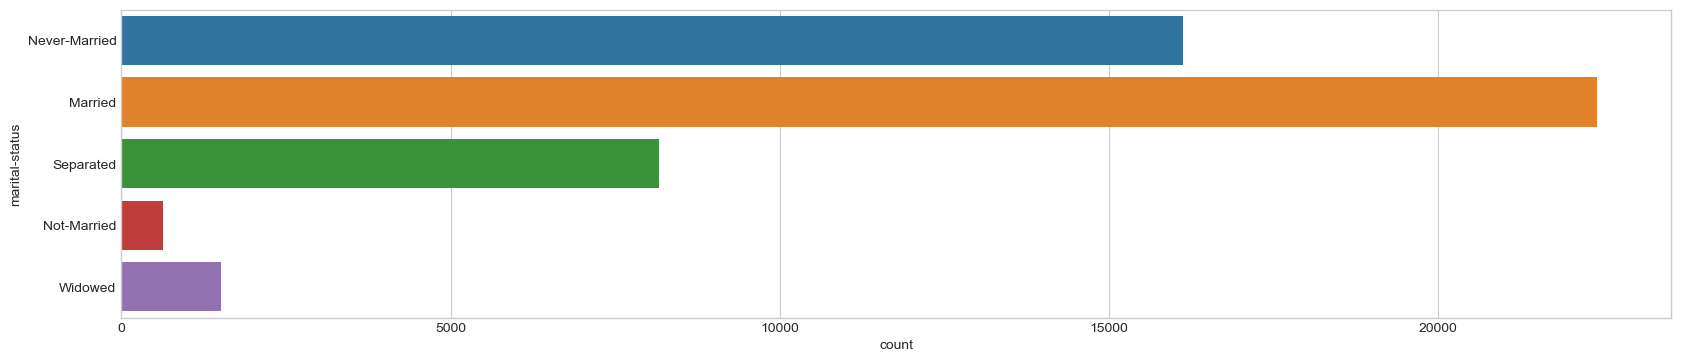

In [215]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,4))
sns.countplot(y = 'marital-status',data=dataset_bin)

In [216]:
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'],10)  #离散化
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']  #未离散

<Axes: xlabel='count', ylabel='fnlwgt'>

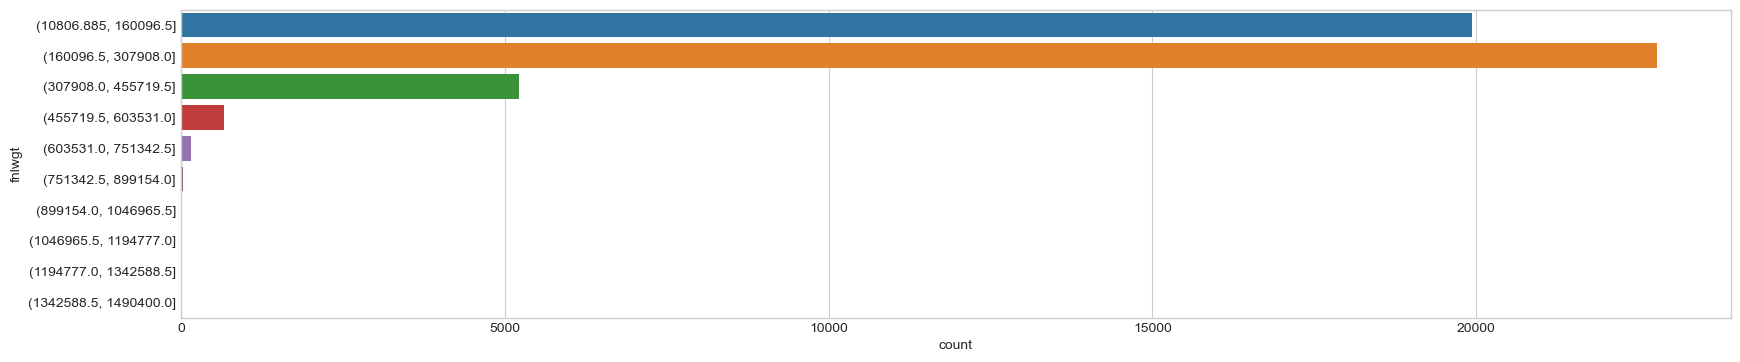

In [217]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="fnlwgt", data=dataset_bin) #画图看一下里面的数据

In [218]:
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'],10)
dataset_con['education-num'] = dataset_raw['education-num']

<Axes: xlabel='count', ylabel='education-num'>

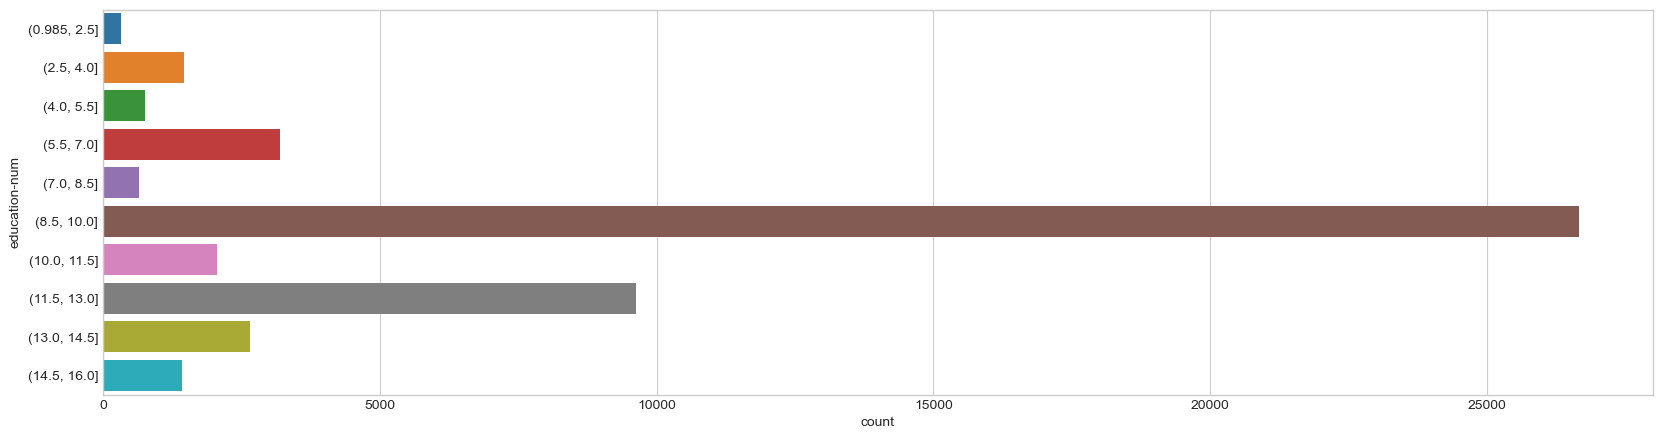

In [219]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
sns.countplot(y = 'education-num',data =dataset_bin)

In [220]:
dataset_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,Non-fed-gov,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,13,Married,Office Labour,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Separated,Manual Labour,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,Dropout,7,Married,Manual Labour,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,South-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Separated,Professional,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married,Professional,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Separated,Admin,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


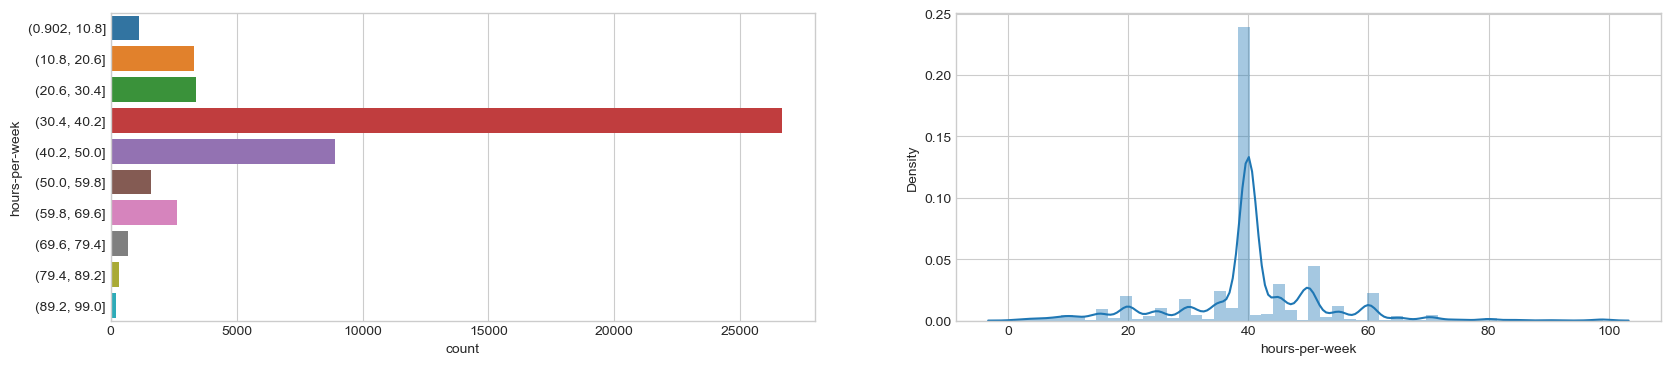

In [221]:
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'],10)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']


plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.countplot(y = 'hours-per-week',data = dataset_bin)

plt.subplot(1, 2, 2)
sns.distplot(dataset_con['hours-per-week'])
plt.show()

In [223]:
dataset_con.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,sex,race,relationship
0,0,39,Non-fed-gov,Admin,United-States,Bachelors,Never-Married,77516,13,40,Male,White,Not-in-family
1,0,50,Self-emp,Office Labour,United-States,Bachelors,Married,83311,13,13,Male,White,Husband
2,0,38,Private,Manual Labour,United-States,HS-grad,Separated,215646,9,40,Male,White,Not-in-family
3,0,53,Private,Manual Labour,United-States,Dropout,Married,234721,7,40,Male,Black,Husband
4,0,28,Private,Professional,South-America,Bachelors,Married,338409,13,40,Female,Black,Wife


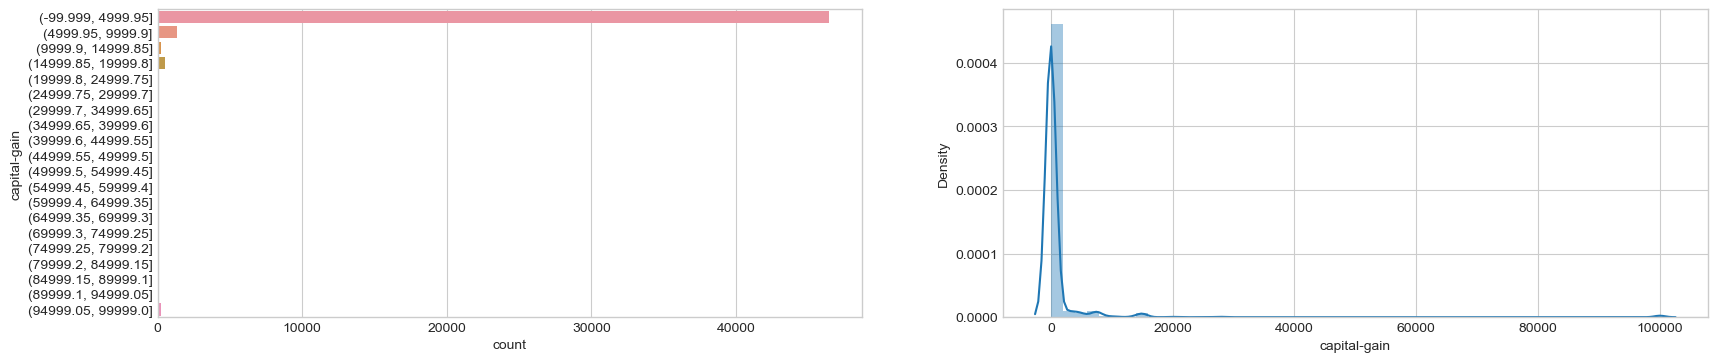

In [225]:
dataset_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 20)
dataset_con['capital-gain'] = dataset_raw['capital-gain']
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.countplot(y = 'capital-gain',data= dataset_bin)

plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-gain'])
plt.show()


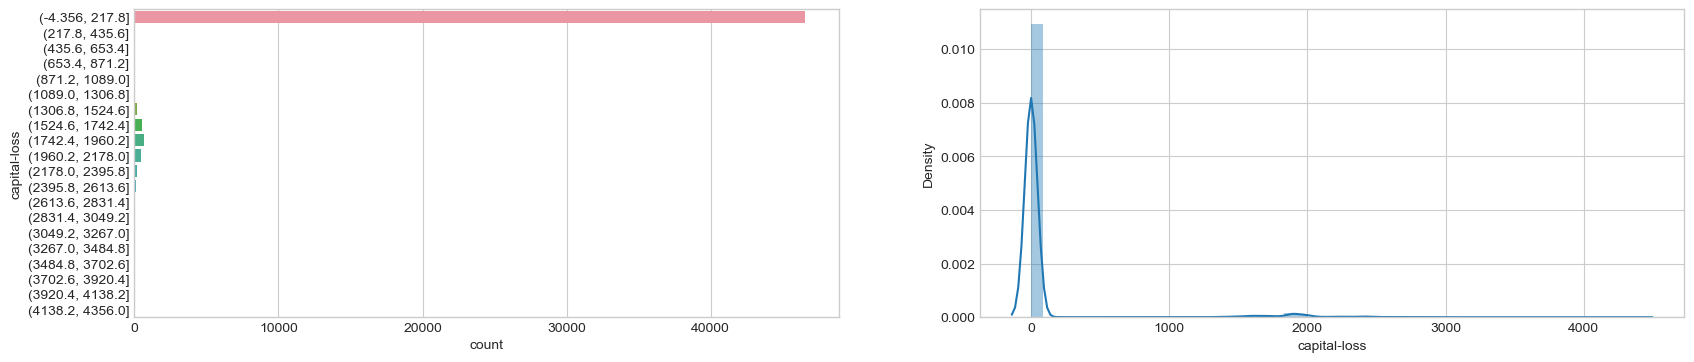

In [226]:
dataset_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 20)
dataset_con['capital-loss'] = dataset_raw['capital-loss']
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.countplot(y = 'capital-loss',data= dataset_bin)

plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-loss'])
plt.show()


In [227]:
# 无需处理  Race：种族  Sex:性别  relationship：家庭的关系
dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']
dataset_con['relationship'] = dataset_bin['relationship'] = dataset_raw['relationship']

In [228]:
dataset_con.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,sex,race,relationship,capital-gain,capital-loss
0,0,39,Non-fed-gov,Admin,United-States,Bachelors,Never-Married,77516,13,40,Male,White,Not-in-family,2174,0
1,0,50,Self-emp,Office Labour,United-States,Bachelors,Married,83311,13,13,Male,White,Husband,0,0
2,0,38,Private,Manual Labour,United-States,HS-grad,Separated,215646,9,40,Male,White,Not-in-family,0,0
3,0,53,Private,Manual Labour,United-States,Dropout,Married,234721,7,40,Male,Black,Husband,0,0
4,0,28,Private,Professional,South-America,Bachelors,Married,338409,13,40,Female,Black,Wife,0,0


In [229]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')  

# 特征选择和编码
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# 机器学习
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 网格搜索、随机搜索
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 模型度量（分类）
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

<Axes: xlabel='age-hours', ylabel='Density'>

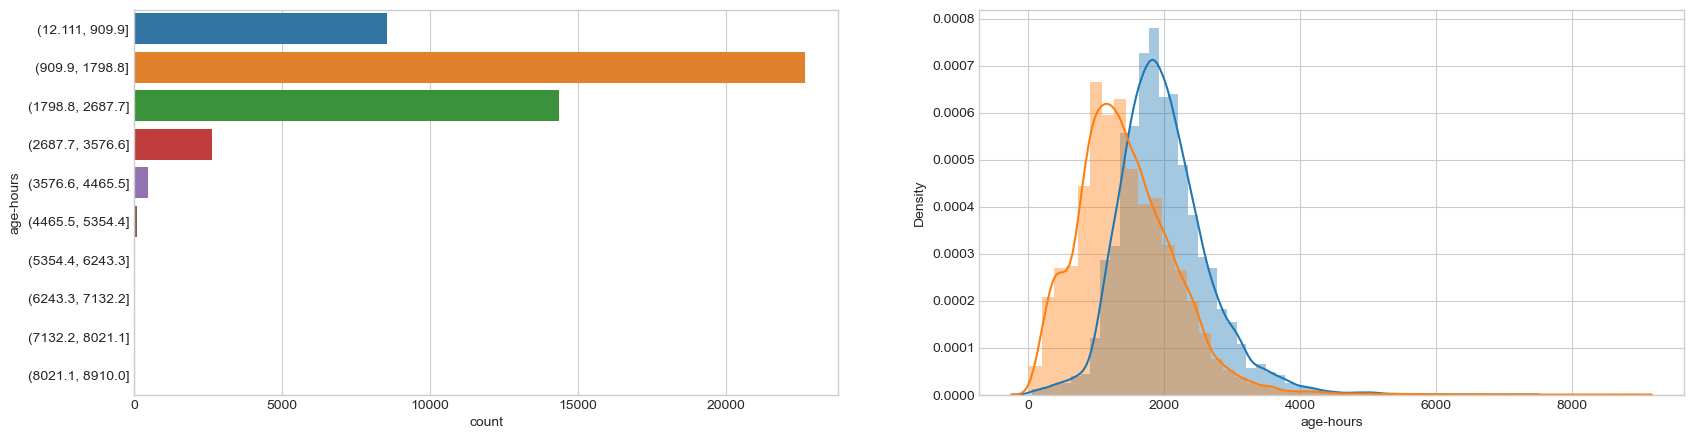

In [230]:
# 连续型特征衍生(age与hours per week共同衍生的特征)
dataset_con['age-hours'] = dataset_con['age'] * dataset_con['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_con['age-hours'],10) #分箱

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y='age-hours',data=dataset_bin)  # 绘制横向数量统计图
plt.subplot(1,2,2)
# 连续型衍生特征的趋势图
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age-hours'])
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age-hours'])

<Axes: xlabel='count', ylabel='sex-marital'>

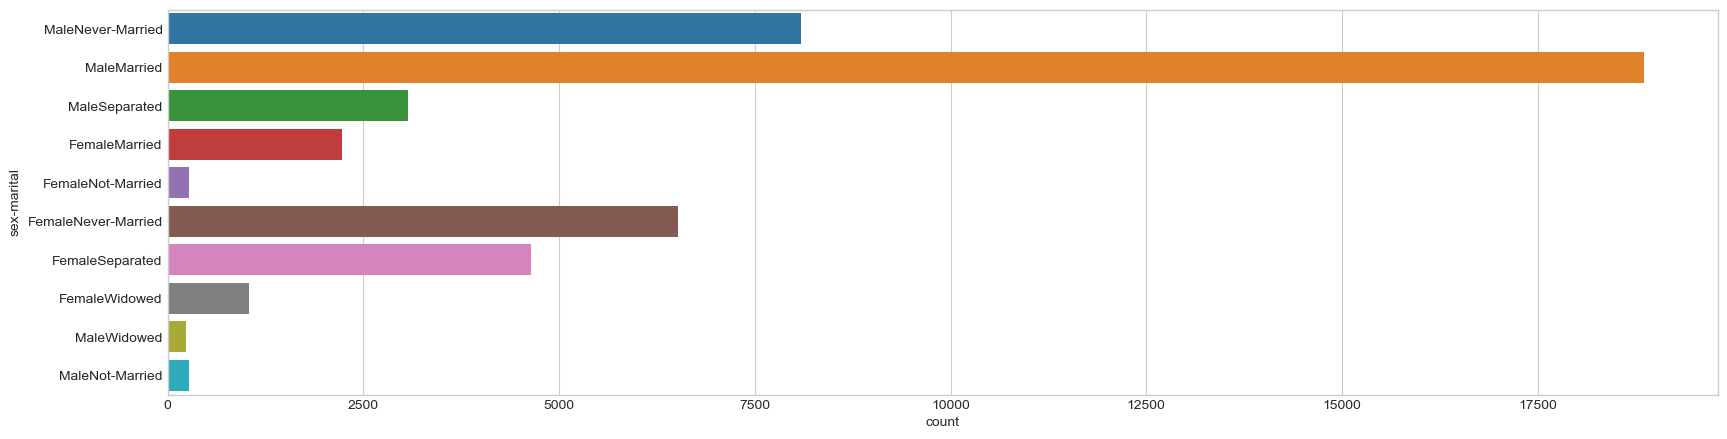

In [241]:
# 离散型特征衍生(sex与marital-status共同衍生的特征)
dataset_bin['sex-marital'] = dataset_con['sex-marital'] = dataset_bin['sex'] + dataset_bin['marital-status']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='sex-marital',data=dataset_bin)


In [242]:
dataset_bin.shape

(45222, 17)

In [243]:
dataset_con.shape

(45222, 17)

In [244]:
dataset_bin = dataset_bin.dropna(axis = 0)
dataset_con = dataset_con.dropna(axis=0)

In [245]:
dataset_bin.shape

(45222, 17)

In [246]:
dataset_con.shape

(45222, 17)

In [247]:
# 所有离散型特征进行one-hot编码
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('predclass')  # 不对标签列进行编码

# One-Hot编码
dataset_bin_enc = pd.get_dummies(dataset_bin,columns=one_hot_cols)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleNot-Married,sex-marital_MaleSeparated,sex-marital_MaleWidowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

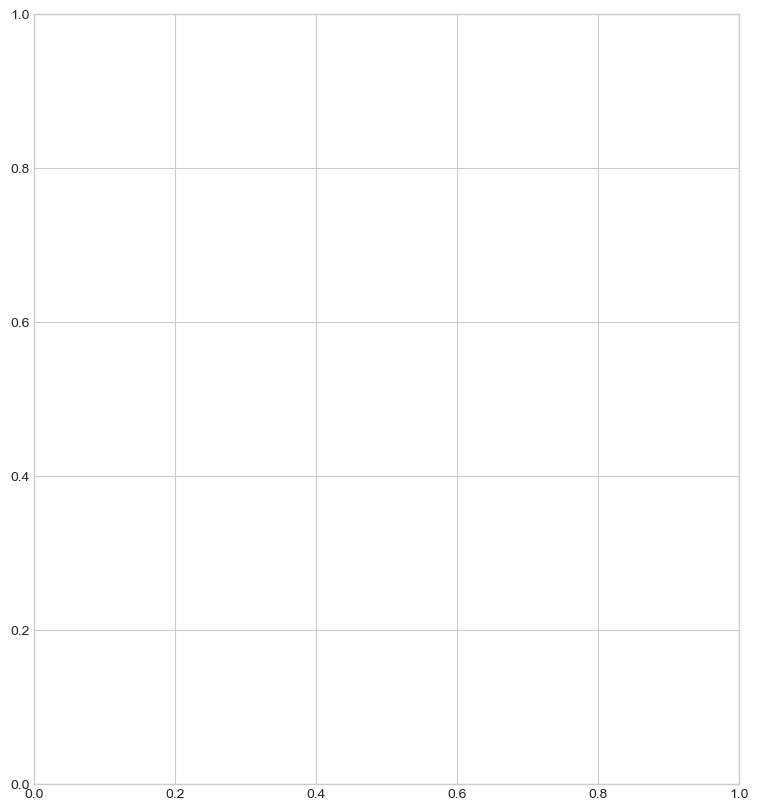

In [248]:
# 绘制两个数据集的热力图
plt.style.use('seaborn-whitegrid')  # 设置绘图风格
fig = plt.figure(figsize=(20,10))

# 绘制第一个热力图
plt.subplot(1,2,1)  # 设置子图，1行2列第一个子图
# 根据dataset_bin_enc的特征相关性，创建布尔型数组
mask = np.zeros_like(dataset_bin_enc.corr(),dtype=np.bool)  
# 将mask中上三角矩阵的索引位置的值设置为True(目的是绘图时将上三角部分隐藏)
mask[np.triu_indices_from(mask)] = True  
# 绘制特征关系热力图
sns.heatmap(dataset_bin_enc.corr(),  #离散型的数据
            vmin=-1,vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r",100),
            mask=mask,    #去掉上三角
            linewidths=.5)

# 绘制第二个热力图
plt.subplot(1,2,2)  # 设置子图，1行2列第二个子图
# 根据dataset_bin_enc的特征相关性，创建布尔型数组
mask = np.zeros_like(dataset_con_enc.corr(),dtype=np.bool)  
# 将mask中上三角矩阵的索引位置的值设置为True(目的是绘图时将上三角部分隐藏)
mask[np.triu_indices_from(mask)] = True  
# 绘制特征关系热力图
sns.heatmap(dataset_con_enc.corr(),
            vmin=-1,vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r",100),
            mask=mask,
            linewidths=.5)

NameError: name 'dataset_con_enc' is not defined